1. What is a Support Vector Machine (SVM)?
- it ia an algorithum in machine learning model , which deals with all the data point as a vector and it is also dimentionlaity maximizing algoritum



2. What is the difference between Hard Margin and Soft Margin SVM?
- hard margining - its ia not possible in practile life as it takes data point which are not missclassified

- soft margining- it  deals with the data points which can overlap each other as well as which are miss classified

3. What is the mathematical intuition behind SVM?
- it treats all data points as a seprate vector

4.  What is the role of Lagrange Multipliers in SVM?
- to minisise |w|/2  with a constraint we introduce a lagrange multiplier in cost function called alpha

5. What are Support Vectors in SVM?
- support vectors are the nearrest data points  to the marginal line of each classs.

6. What is a Support Vector Classifier (SVC)?
- the support vector mechine used for the classification dataset is called support vector classifier.

7. What is a Support Vector Regressor (SVR)?
- the  SVR is a class in the svm module use dfor the regression problem

8. What is a Support Vector Regressor (SVR)?
- in SVR kernal trick is used diffrently for diffrent kind os data sets and increases efficiency and computational time. some of the examples of the kernals are ,  rbf,linear,sigmoid

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?
-  Linear Kernel:
Data is linearly separable
High-dimensional, sparse features (e.g., text)
You want fast and interpretable results

- Polynomial Kernel:
You believe there's a polynomial relationship
You want to model curves or complex boundaries
More flexible than linear, but can overfit

- RBF Kernel:
You don’t know the data distribution
You expect complex, non-linear boundaries
Most commonly used kernel for general problems

10. What is the effect of the C parameter in SVM?
- c patameter is number of missclassified data sets in svm and , mode number of miss classified data points

11. What is the role of the Gamma parameter in RBF Kernel SVM?
The Gamma parameter defines the influence of a single training example. Small gamma means a large influence, leading to smoother decision boundaries. Large gamma means a small influence, resulting in more complex and potentially overfitting boundaries.

12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
Naïve Bayes is a probabilistic classifier based on Bayes' Theorem. It's "naïve" because it assumes that all features are conditionally independent of each other given the class, which is rarely true in reality but simplifies calculations.

13. What is Bayes' Theorem?
Bayes' Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. Mathematically, it's P(A∣B)=
P(B)
P(B∣A)P(A)
​
 .

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

Gaussian Naïve Bayes: Assumes features follow a Gaussian (normal) distribution.
Multinomial Naïve Bayes: Used for discrete counts, like word counts in text classification.
Bernoulli Naïve Bayes: Suitable for binary or boolean features, where features are indicators of presence/absence.
15. When should you use Gaussian Naïve Bayes over other variants?
You should use Gaussian Naïve Bayes when your features are continuous and can be reasonably assumed to follow a normal distribution.

16. What are the key assumptions made by Naïve Bayes?
The primary assumption is conditional independence of features given the class label. It also assumes that all features contribute equally to the prediction.

17. What are the advantages and disadvantages of Naïve Bayes?
Advantages: Simple, fast, works well with large datasets, effective for text classification.
Disadvantages: Strong independence assumption can lead to poor performance if violated, sensitive to feature correlation, zero-frequency problem.

18. Why is Naïve Bayes a good choice for text classification?
It's efficient and performs well with high-dimensional data like text, where features (words) often occur independently enough, and its probabilistic nature handles word frequencies effectively.

19. Compare SVM and Naïve Bayes for classification tasks.
SVM focuses on finding an optimal decision boundary, robust to high dimensions and overfitting with kernels. Naïve Bayes is simpler, faster, and probabilistic, but relies on a strong independence assumption. SVM often outperforms Naïve Bayes when the independence assumption is violated.

20. How does Laplace Smoothing help in Naïve Bayes?
Laplace smoothing (add-one smoothing) addresses the zero-frequency problem by adding a small constant (usually 1) to all counts. This prevents zero probabilities for unseen features, ensuring numerical stability and improving robustness.

# PRACTICLE QUESTIONS

In [ ]:
#21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



#hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

param = {"C" :[2,45,80,23,85],
         "gamma" :[2,4,0.03,0.45],
         "kernel":["rbf","linear","sigmoid"]
         }

random = RandomizedSearchCV(estimator=svc_clf, param_distributions=param,verbose=2,cv=4)
random.fit(x_train,y_train)
best_model = random.best_estimator_
y_pred_tunned = best_model.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(accuracy_score(y_test,y_pred_tunned))
print(classification_report(y_test,y_pred_tunned))



1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END ....................C=23, gamma=0.03, kernel=linear; total time=   0.0s
[CV] END ....................C=23, gamma=0.03, kernel=linear; total time=   0.0s
[CV] END ....................C=23, gamma=0.03, kernel=linear; total time=   0.0s
[CV] END ....................C=23, gamma=0.03, kernel=linear; total time=   0.0s
[CV] END ...................C=23, gamma=0.03, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=23, gamma=0.03, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=23, gamma=0.03, kernel=sigmoid; total 

In [ ]:
#22.  Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
# compare their accuracies

import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.svm import SVC
svc_clf = SVC(kernel="linear")
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(f"accurecy score of linear kernal is {accuracy_score(y_test,y_pred)}")

from sklearn.svm import SVC
svc_clf = SVC(kernel="rbf")
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(f"accurecy score of rbf kernal is {accuracy_score(y_test,y_pred)}")

accurecy score of linear kernal is 1.0
accurecy score of rbf kernal is 0.8055555555555556


In [ ]:
#23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
# Squared Error (MSE)
import pandas as pd
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.svm import SVR
svc_clf = SVR(kernel="linear")
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)


from sklearn.metrics import mean_squared_error
print(f" { mean_squared_error(y_test,y_pred)}")

accurecy score of linear kernal is 0.8333333333333334


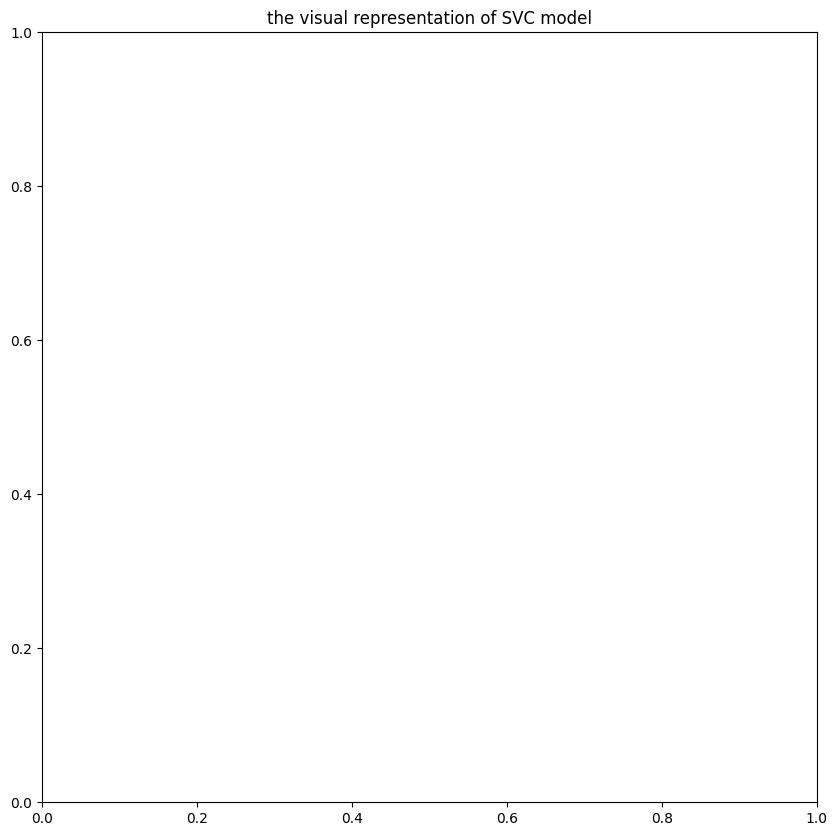

In [2]:
#24. rite a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
# boundary

import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.svm import SVC
svc_clf = SVC(kernel="poly")
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(f"accurecy score of linear kernal is {accuracy_score(y_test,y_pred)}")


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("the visual representation of SVC model")
def plot_decision_boundary(model, X, y):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Alcohol")
    plt.ylabel("Color Intensity")
    plt.title("SVM with Polynomial Kernel (degree=3)")
    plt.show()




In [3]:
#25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
# evaluate accuracy
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.naive_bayes import GaussianNB

clf =  GaussianNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(f" {accuracy_score(y_test,y_pred)}")


 0.9736842105263158


Accuracy: 0.8627659574468085

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.87      0.73      0.80       213
         comp.graphics       0.95      0.92      0.94       251
               sci.med       0.96      0.85      0.90       255
soc.religion.christian       0.71      0.94      0.81       221

              accuracy                           0.86       940
             macro avg       0.87      0.86      0.86       940
          weighted avg       0.88      0.86      0.86       940



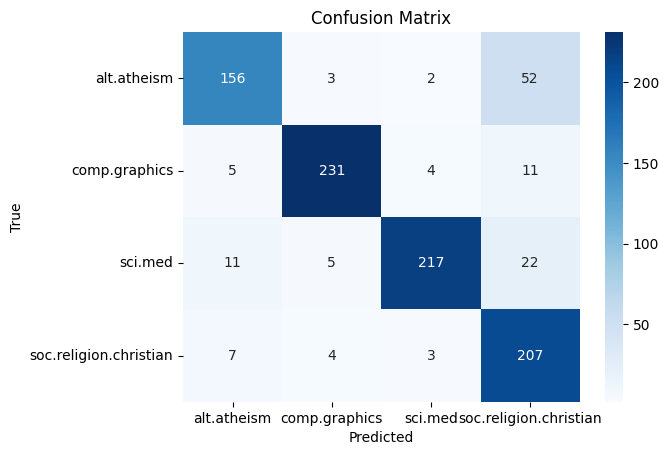

In [5]:
#26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
# Newsgroups dataset


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))


X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)


model = make_pipeline(CountVectorizer(), MultinomialNB())


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))


conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


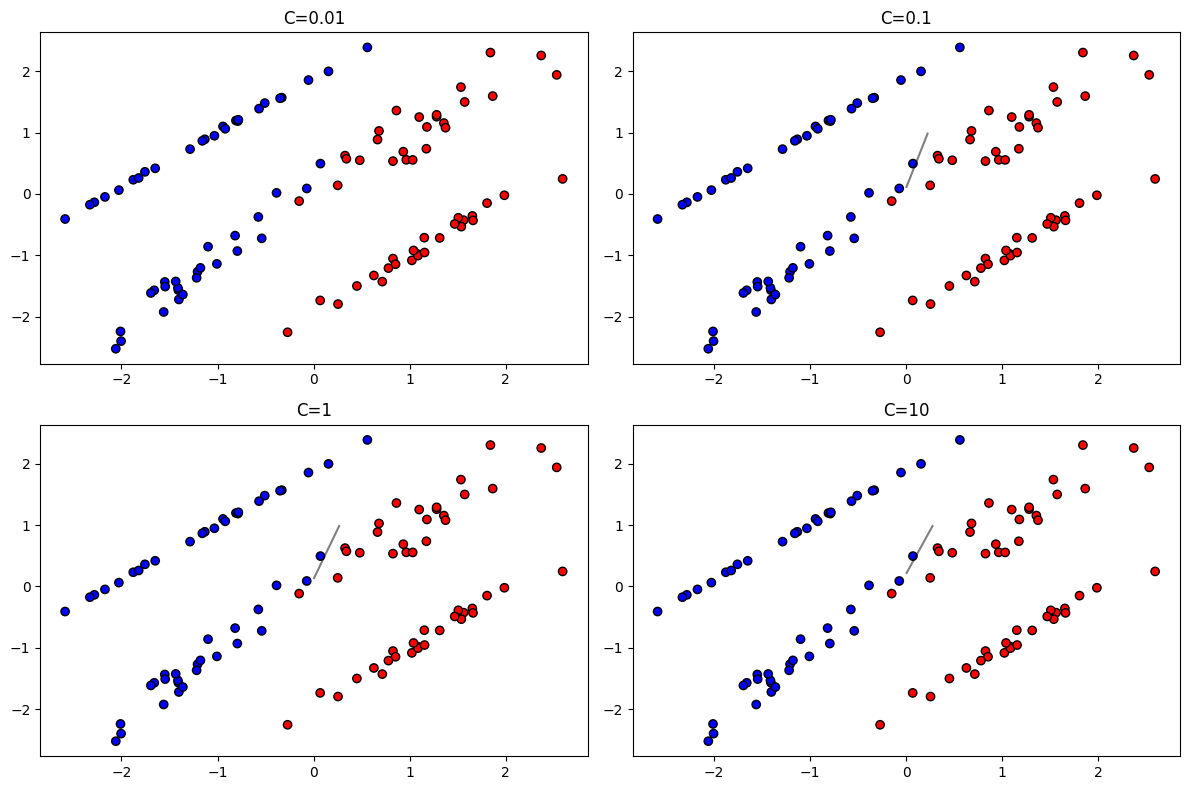

In [6]:
#27. Write a Python program to train an SVM Classifier with different C values and compare the decision
#boundaries visually
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=42)

C_values = [0.01, 0.1, 1, 10]
plt.figure(figsize=(12, 8))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    plt.subplot(2, 2, i+1)
    plt.title(f"C={C}")

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

plt.tight_layout()
plt.show()



In [8]:
#28.Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
#binary features
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_classes=2, random_state=42)
X_binary = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2)
model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.87


In [9]:
#29. Write a Python program to apply feature scaling before training an SVM model and compare results with
#unscaled data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_unscaled = SVC()
model_scaled = make_pipeline(StandardScaler(), SVC())

model_unscaled.fit(X_train, y_train)
model_scaled.fit(X_train, y_train)

print("Unscaled accuracy:", model_unscaled.score(X_test, y_test))
print("Scaled accuracy:", model_scaled.score(X_test, y_test))





Unscaled accuracy: 0.87
Scaled accuracy: 0.87


In [10]:
#30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
#after Laplace Smoothing
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print("Accuracy without smoothing:", model.score(X_test, y_test))

# Laplace smoothing is not directly available in GaussianNB (more for MultinomialNB).
# But we can simulate prior tweaks:
model = GaussianNB(var_smoothing=1e-9)
model.fit(X_train, y_train)
print("Accuracy with smoothing:", model.score(X_test, y_test))



Accuracy without smoothing: 0.87
Accuracy with smoothing: 0.87


In [11]:
#31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
#gamma, kernel)
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best accuracy:", grid.best_score_)



Best params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy: 0.86


In [12]:
#32.  Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
#check it improve accuracy
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, weights=[0.1, 0.9], n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

print("Accuracy with class_weight:", model.score(X_test, y_test))



Accuracy with class_weight: 0.904


In [13]:
#33.  Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

emails = ["Free money now!!!", "Hi, how are you?", "You won a lottery!", "Meeting at 3 PM"]
labels = [1, 0, 1, 0]

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(emails)

model = MultinomialNB()
model.fit(X, labels)

print("Prediction:", model.predict(X))



Prediction: [1 0 1 0]


In [14]:
#34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
#compare their accuracy

from sklearn.naive_bayes import GaussianNB
svm_model = SVC()
nb_model = GaussianNB()

svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

print("SVM accuracy:", svm_model.score(X_test, y_test))
print("Naive Bayes accuracy:", nb_model.score(X_test, y_test))


SVM accuracy: 0.916
Naive Bayes accuracy: 0.904


In [15]:
#35.  Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
#results

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y)

model = GaussianNB()
model.fit(X_train, y_train)
print("Accuracy after feature selection:", model.score(X_test, y_test))


ValueError: Found input variables with inconsistent numbers of samples: [4, 1000]

In [16]:
#36.  Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
#strategies on the Wine dataset and compare their accuracy
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X, y)
ovo.fit(X, y)

print("OvR Accuracy:", ovr.score(X, y))
print("OvO Accuracy:", ovo.score(X, y))



OvR Accuracy: 0.6853932584269663
OvO Accuracy: 0.7247191011235955


In [17]:
#37.Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
#Cancer dataset and compare their accuracy
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(f"{kernel} kernel accuracy:", model.score(X_test, y_test))



linear kernel accuracy: 0.936
poly kernel accuracy: 0.892
rbf kernel accuracy: 0.916


In [18]:
#38.Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
#average accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(SVC(), X, y, cv=skf)
print("Average accuracy:", scores.mean())



Average accuracy: 0.9121720229777983


In [19]:
#39.Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
#performance
model1 = GaussianNB(priors=[0.3, 0.7])
model2 = GaussianNB(priors=[0.5, 0.5])

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print("Accuracy with 0.3/0.7 prior:", model1.score(X_test, y_test))
print("Accuracy with 0.5/0.5 prior:", model2.score(X_test, y_test))



Accuracy with 0.3/0.7 prior: 0.82
Accuracy with 0.5/0.5 prior: 0.76


In [20]:
#40.Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
#compare accuracy

from sklearn.feature_selection import RFE

svm = SVC(kernel="linear")
selector = RFE(svm, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

model = SVC()
model.fit(selector.transform(X_train), y_train)
print("Accuracy after RFE:", model.score(selector.transform(X_test), y_test))


Accuracy after RFE: 0.92


In [22]:
#41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
# F1-Score instead of accuracy

import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.svm import SVC
svc_clf = SVC(kernel="poly")
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)


from sklearn.metrics import f1_score,precision_score,recall_score

print(f1_score(y_test,y_pred,average = "macro"))
print(precision_score(y_test,y_pred ,average = "macro"))
print(recall_score(y_test,y_pred ,average = "macro"))



0.7380006966213863
0.8900584795321637
0.75


In [23]:
#42.  Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
# (Cross-Entropy Loss)

import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.naive_bayes import GaussianNB

clf =  GaussianNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import log_loss
print(f" {log_loss(y_test,y_pred)}")



 0.9485171944504516


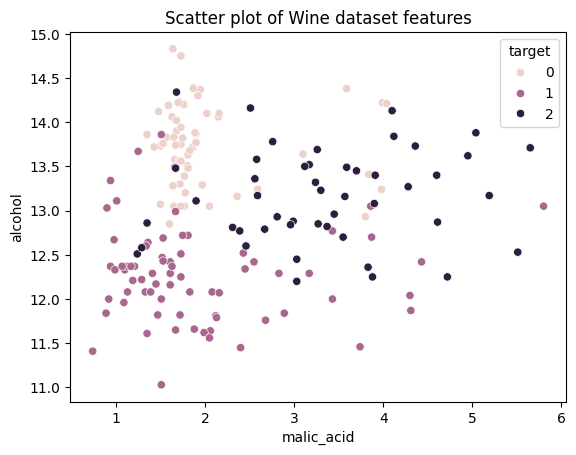

In [26]:
#43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.svm import SVC
svc_clf = SVC(kernel="poly")
svc_clf.fit(x_train,y_train)
y_pred = svc_clf.predict(x_test)


import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=x.iloc[:,1], y=x.iloc[:,0], hue=y)
plt.xlabel(data.feature_names[1])
plt.ylabel(data.feature_names[0])
plt.title("Scatter plot of Wine dataset features")
plt.show()




In [27]:
#44.  Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
# Error (MAE) instead of MSE

import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.svm import SVR
svc_reg = SVR(kernel="poly")
svc_reg.fit(x_train,y_train)
y_pred = svc_reg.predict(x_test)


from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))





0.4568988094683955


In [28]:
#45.  Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
# score
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.naive_bayes import GaussianNB

clf =  GaussianNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import roc_auc_score
print(f" {roc_auc_score(y_test,y_pred)}")





 0.9651162790697674


In [34]:
#46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve?
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns= data.feature_names)

df["target"]= data.target
x= df.iloc[:,:-1]
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size = 0.2,random_state = 42)


from sklearn.naive_bayes import GaussianNB

clf =  GaussianNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)


#visualisation
pr_auc = auc(recall, precision)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()






NameError: name 'auc' is not defined